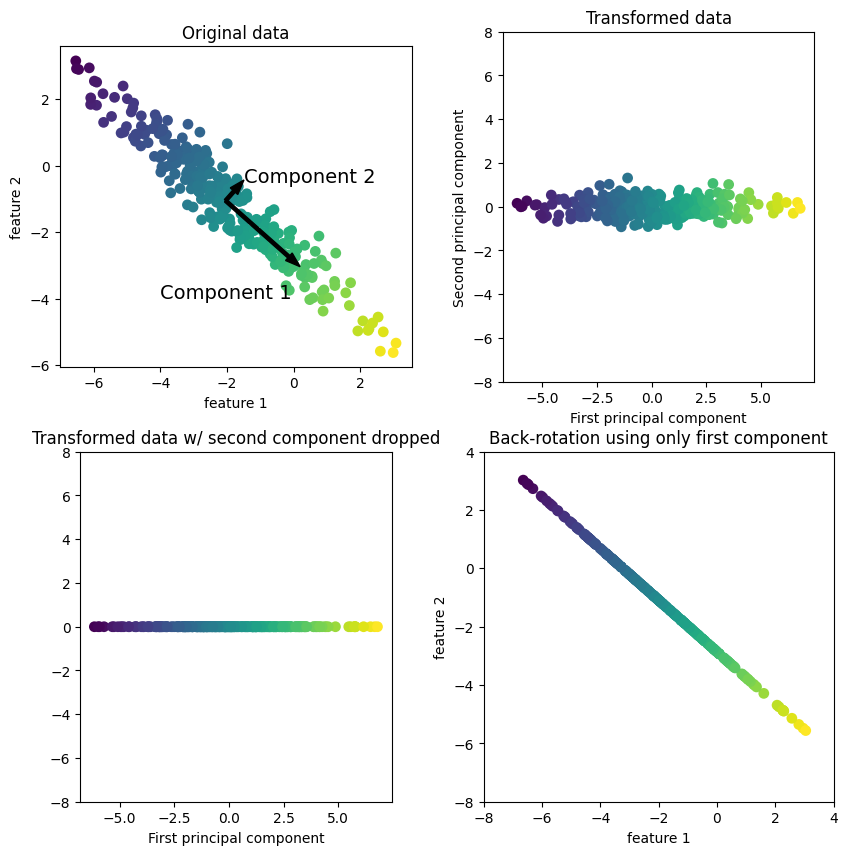

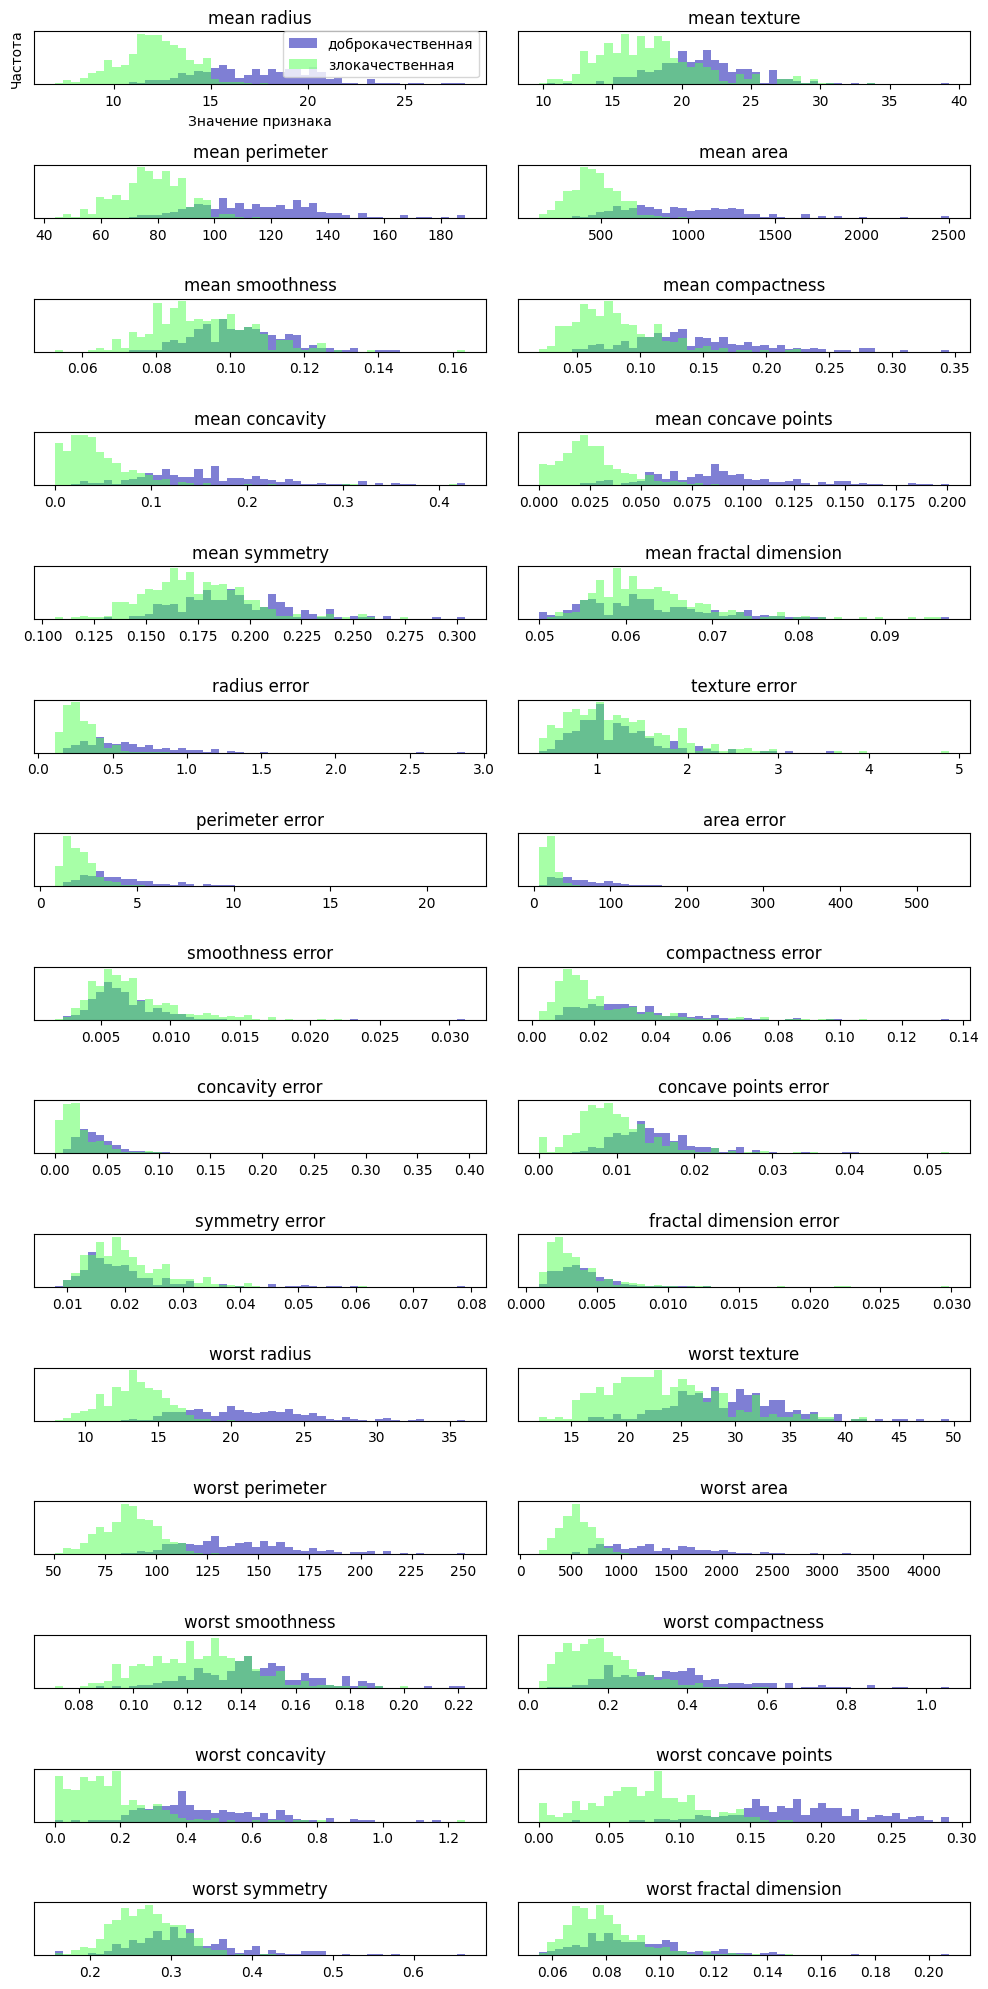

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


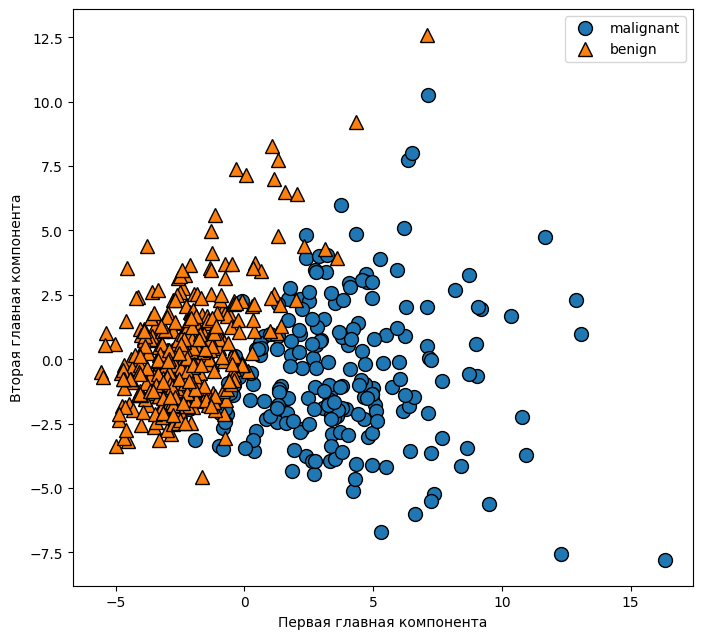

Форма главных компонент: (2, 30)
Компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


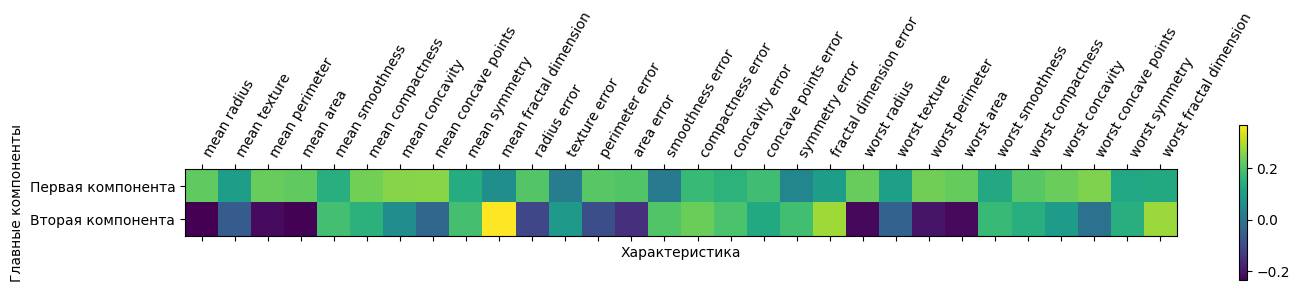

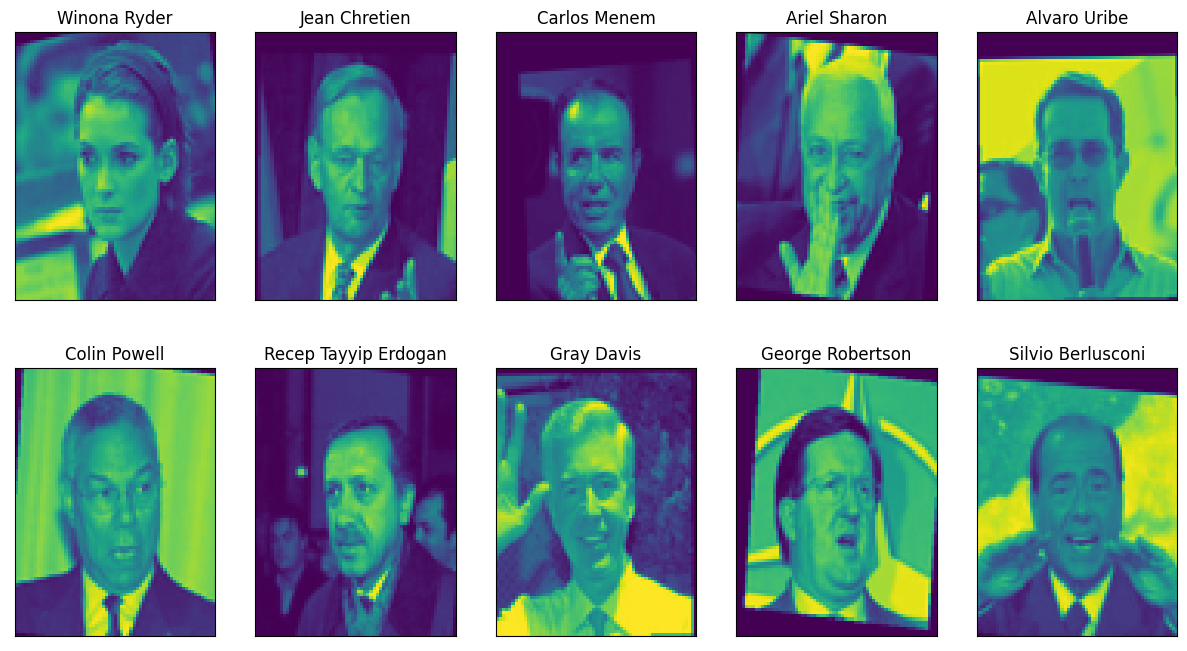

Форма массива изображений лиц: (3023, 87, 65)
Количество классов: 62
Alejandro Toledo          39Alvaro Uribe              35Amelie Mauresmo           21
Andre Agassi              36Angelina Jolie            20Ariel Sharon              77
Arnold Schwarzenegger     42Atal Bihari Vajpayee      24Bill Clinton              29
Carlos Menem              21Colin Powell             236David Beckham             31
Donald Rumsfeld          121George Robertson          22George W Bush            530
Gerhard Schroeder        109Gloria Macapagal Arroyo   44Gray Davis                26
Guillermo Coria           30Hamid Karzai              22Hans Blix                 39
Hugo Chavez               71Igor Ivanov               20Jack Straw                28
Jacques Chirac            52Jean Chretien             55Jennifer Aniston          21
Jennifer Capriati         42Jennifer Lopez            21Jeremy Greenstock         24
Jiang Zemin               20John Ashcroft             53John Negroponte          

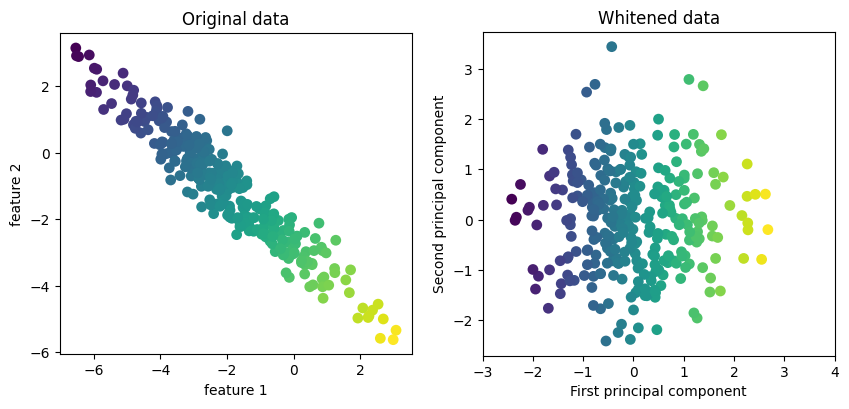

In [ ]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


Анализ главных компонент (PSA)

метод, который осуществляет вращение данных с тем, чтобы преобразованные признаки не коррелировали между собой

Анализ главных компонент (PCA) - это метод, который помогает нам понять и визуализировать основные закономерности в данных, уменьшая размерность набора признаков.

PCA помогает нам найти новые "основные компоненты", которые являются линейными комбинациями исходных признаков.

Главные компоненты (principal components)

направления, которые являются основными направлениями дисперсии данных

Мы создаем экземпляр объекта PCA, находим главные компоненты, вызвав метод fit, а затем применяем вращение и снижение размерности, вызвав метод transform.По умолчанию PCAлишь поворачивает (и смещает) данные, но сохраняет все главные компоненты. Чтобы уменьшить размерность данных, нам нужно указать, сколько компонент мы хотим сохранить при создании объекта PCA

В основе PCA лежит математическое преобразование данных, которое ищет направления в пространстве признаков, где разброс данных максимален. Эти направления называются главными компонентами. Главная компонента с наибольшим разбросом данных называется первой главной компонентой, вторая - второй, и так далее.

Когда мы применяем PCA к данным, он вращает их таким образом, чтобы главные компоненты стали новыми осями координат

Это позволяет нам снизить размерность данных, сохраняя при этом как можно больше информации.

Таким образом, PCA помогает нам упростить сложные наборы данных, уменьшить размерность и выделить важные особенности, одновременно избегая корреляции между новыми признаками.

Максимально возможное количество главных компонент равно количеству исходных признаков

Одним из наиболее распространенных применений PCA является визуализация высокоразмерных наборов данных.

выбеливание не только поворачивает данные, но и масштабирует их таким образом, чтобы центральный график представлял собой окружность вместо эллипса

In [ ]:

mglearn.plots.plot_pca_illustration()
plt.show()

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
fig.tight_layout()
plt.show()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
#оставляем первые две главные компоненты
pca = PCA(n_components=2)
#подгоняем модель PCA на наборе данных breast cancer
pca.fit(X_scaled)
#преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

#строим график первых двух главных компонент, классы выделены цветом
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()

print("Форма главных компонент: {}".format(pca.components_.shape))
print("Компоненты PCA:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")
plt.show()

#conda install -c anaconda openssl
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.show()

print("Форма массива изображений лиц: {}".format(people.images.shape))
print("Количество классов: {}".format(len(people.target_names)))

#вычисляем частоту встречаемости каждого ответа
counts = np.bincount(people.target)

#печатаем частоты рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='')
    if (i + 1) % 3 == 0:
        print()

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

#для получения большей стабильности масштабируем шкалу оттенков серого так,
#чтобы значения были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.

from sklearn.neighbors import KNeighborsClassifier

#разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

#строим KNeighborsClassifier с одним соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Правильность на тестовом наборе для 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

mglearn.plots.plot_pca_whitening()
plt.show()

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("обучающие данные после PCA: {}".format(X_train_pca.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("форма pca.components_: {}".format(pca.components_.shape))

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i+1)))
plt.show()
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
plt.show()

mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()